In [1]:
#%load_ext autoreload

In [2]:
#%autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
import gvar as gv
import h5py as h5
import lsqfit
import two_point as tp

# set parameters

In [3]:
# parameters
params = dict()
params['data_select'] = ['SS','PS']
params['ansatz'] = 'simultaneous'
params['nstates'] = 3 # can vary these
params['tmin'] = [2,13] # can vary these
params['tmax'] = [17,17] # can vary these

# read Data

In [4]:
# load data
fh5 = h5.File('./nn_0mom_concat.h5')
o_data = tp.read_data(fh5,'/pp_SING_OO') # can change to be OA, OC, TRIP, etc.
for files in fh5:
    print(files)
fh5.close()

pn_TRIP_OA_LC
pn_TRIP_OA_LC_np
pn_TRIP_OA_LC_pp
pn_TRIP_OA_PS
pn_TRIP_OA_PS_np
pn_TRIP_OA_PS_pp
pn_TRIP_OA_SS
pn_TRIP_OA_SS_np
pn_TRIP_OA_SS_pp
pn_TRIP_OC_LC
pn_TRIP_OC_LC_np
pn_TRIP_OC_LC_pp
pn_TRIP_OC_PS
pn_TRIP_OC_PS_np
pn_TRIP_OC_PS_pp
pn_TRIP_OC_SS
pn_TRIP_OC_SS_np
pn_TRIP_OC_SS_pp
pn_TRIP_OO_LC
pn_TRIP_OO_LC_np
pn_TRIP_OO_LC_pp
pn_TRIP_OO_PS
pn_TRIP_OO_PS_np
pn_TRIP_OO_PS_pp
pn_TRIP_OO_SS
pn_TRIP_OO_SS_np
pn_TRIP_OO_SS_pp
pp_SING_OA_LC
pp_SING_OA_LC_np
pp_SING_OA_LC_pp
pp_SING_OA_PS
pp_SING_OA_PS_np
pp_SING_OA_PS_pp
pp_SING_OA_SS
pp_SING_OA_SS_np
pp_SING_OA_SS_pp
pp_SING_OC_LC
pp_SING_OC_LC_np
pp_SING_OC_LC_pp
pp_SING_OC_PS
pp_SING_OC_PS_np
pp_SING_OC_PS_pp
pp_SING_OC_SS
pp_SING_OC_SS_np
pp_SING_OC_SS_pp
pp_SING_OO_LC
pp_SING_OO_LC_np
pp_SING_OO_LC_pp
pp_SING_OO_PS
pp_SING_OO_PS_np
pp_SING_OO_PS_pp
pp_SING_OO_SS
pp_SING_OO_SS_np
pp_SING_OO_SS_pp
prot_LC
prot_LC_np
prot_LC_pp
prot_PS
prot_PS_np
prot_PS_pp
prot_SS
prot_SS_np
prot_SS_pp


In [5]:
#data = dict()
#for i,s in enumerate(['SS','PS']):
 #   data[s] = o_data['proton'][:,:,i,0]
gvdata_p = gv.dataset.avg_data(o_data[0])
gvdata_pp = gv.dataset.avg_data(o_data[1])
gvdata_pp.keys()

KeysView(BufferDict([('PS', array([1.586(10)e-22, 1.523(10)e-23, 1.489(11)e-24, 1.791(14)e-25,
       2.634(22)e-26, 4.522(39)e-27, 8.691(77)e-28, 1.804(17)e-28,
       3.941(39)e-29, 8.895(95)e-30, 2.059(25)e-30, 4.853(63)e-31,
       1.158(16)e-31, 2.788(43)e-32, 6.78(12)e-33, 1.662(32)e-33,
       4.065(88)e-34, 1.004(25)e-34, 2.460(74)e-35, 5.94(23)e-36,
       1.441(81)e-36, 3.73(35)e-37, 9.6(1.3)e-38, 2.40(39)e-38,
       6.4(1.2)e-39, 1.71(40)e-39, 4.2(1.3)e-40, 9.3(4.2)e-41,
       1.0(1.3)e-41, -3.6(4.7)e-42, -1.7(1.8)e-42, -9.9(6.8)e-43],
      dtype=object)), ('SS', array([7.151(88)e-32, 3.292(30)e-33, 3.864(33)e-34, 5.943(52)e-35,
       1.0542(99)e-35, 2.081(20)e-36, 4.365(41)e-37, 9.614(97)e-38,
       2.193(23)e-38, 5.066(63)e-39, 1.199(16)e-39, 2.845(40)e-40,
       6.89(11)e-41, 1.664(29)e-41, 4.075(82)e-42, 9.98(22)e-43,
       2.445(63)e-43, 6.12(19)e-44, 1.496(58)e-44, 3.69(20)e-45,
       9.13(80)e-46, 2.39(27)e-46, 6.3(1.1)e-47, 1.54(34)e-47,
       4.20(93)e-48, 

# plot eff mass

PS
SS


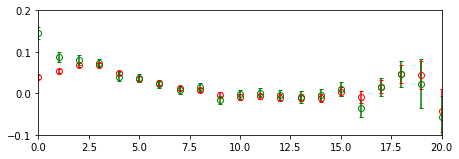

In [6]:
tp.plot_meff(gvdata_p,gvdata_pp,lim=[0,20,-.1,.2],tau=1)

# Pick Priors for Energies
e_0 = E_0

Force excited states to have hierarchy

e_1 = e_0 + exp(log(dE_1)) : log(dE_1) = log(e_1 - e_0)  

e_2 = e_1 + exp(log(dE_2)) etc

In [16]:

prior = dict()
prior['E_0'] = gv.gvar(0.1,0.3) # change these
prior['log(dE_1)'] = gv.gvar(0.2,0.3) # change these (for reference, m_pi ~ 0.588832 in lattice units, and L=24)
prior['log(dE_2)'] = gv.gvar(0.2,0.3) # change these

# Plot Effective Overlap factors, z_S and z_P
The model for the correlation functions in this fit are

C_{SS}(t) = sum_{n} z_{S,n}^2 e^{-E_n t}

C_{PS}(t) = sum_{n} z_{P,n} z_{S,n} e^{-E_n t}

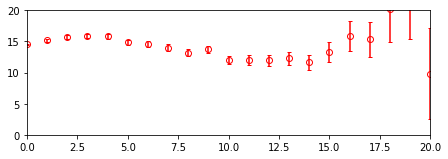

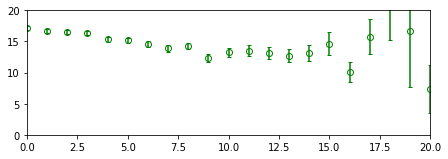

In [17]:
tp.plot_zeff(gvdata_p,gvdata_pp,tau=1,xlim=[0,20],ylimS=[0,20],ylimP=[0,20])

# Pick Priors for overlap factors

In [18]:
prior['zS_0'] = gv.gvar(20.,20.) # change these
prior['zS_1'] = gv.gvar(20.,20.) # change these
prior['zS_2'] = gv.gvar(20.,20.) # change these
prior['zS_3'] = gv.gvar(20.,20.) # change these
prior['zP_0'] = gv.gvar(20.,20.) # change these
prior['zP_1'] = gv.gvar(20.,20.) # change these
prior['zP_2'] = gv.gvar(20.,20.) # change these
prior['zP_3'] = gv.gvar(20.,20.) # change these

# fit correlators

In [19]:
# instantiate fit class
Fit = tp.Fit(params)
# select prior
p = Fit.priors(prior)
# vary fit over tmin and tmax
result = []
for tmin in range(params['tmin'][0],params['tmin'][1]+1):
    for tmax in range(params['tmax'][0],params['tmax'][1]+1):
        x = np.arange(tmin,tmax+1)
        y = {key: gvdata_pp[key][x]/(gvdata_p[key][x]*gvdata_p[key][x]) for key in params['data_select']}
        fit = lsqfit.nonlinear_fit(data=(x,y),prior=p,fcn=Fit.fit_function)
        result.append((tmin,tmax,fit))
result = np.array(result)

In [20]:
print('tmin E_0')
for r in range(len(result)):
    print( '%4d %s' %(result[r][0],result[r][2].p['E_0']))
fit_r = 0
print('')
print(result[fit_r][0:2],result[fit_r][2])

tmin E_0
   2 -0.0061(62)
   3 -0.0029(54)
   4 0.0006(50)
   5 0.0012(47)
   6 -0.0005(46)
   7 -0.0020(48)
   8 -0.0026(55)
   9 0.0002(45)
  10 -0.0025(51)
  11 -0.0020(56)
  12 -0.0065(69)
  13 -0.0057(74)

[2 17] Least Square Fit:
  chi2/dof [dof] = 1.4 [32]    Q = 0.057    logGBF = -84.889

Parameters:
            E_0   -0.0061 (62)      [  0.10 (30) ]  
      log(dE_1)     -1.08 (14)      [  0.20 (30) ]  ****
      log(dE_2)      0.24 (29)      [  0.20 (30) ]  
           zS_0     12.71 (45)      [    20 (20) ]  
           zS_1     11.57 (48)      [    20 (20) ]  
           zS_2      6.8 (5.4)      [    20 (20) ]  
           zP_0     12.48 (47)      [    20 (20) ]  
           zP_1     11.98 (80)      [    20 (20) ]  
           zP_2       -19 (16)      [    20 (20) ]  *
--------------------------------------------------
           dE_1     0.341 (46)      [  1.22 (37) ]  **
           dE_2      1.27 (37)      [  1.22 (37) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,

[(2, -0.0061(62)), (3, -0.0029(54)), (4, 0.0006(50)), (5, 0.0012(47)), (6, -0.0005(46)), (7, -0.0020(48)), (8, -0.0026(55)), (9, 0.0002(45)), (10, -0.0025(51)), (11, -0.0020(56)), (12, -0.0065(69)), (13, -0.0057(74))]
[(2, 0.056709265701640976), (3, 0.1889606874202641), (4, 0.24415460943156644), (5, 0.32220135673885814), (6, 0.5443762013962735), (7, 0.5351462280865721), (8, 0.4887196394749493), (9, 0.5049929859036117), (10, 0.4516103377142864), (11, 0.6021876482392127), (12, 0.7007048519142061), (13, 0.5854985888071864)]


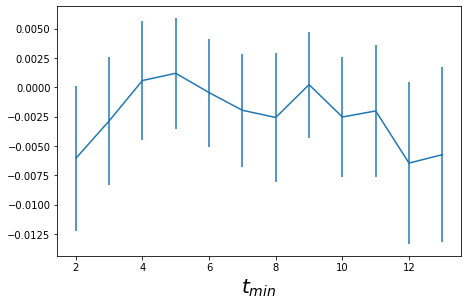

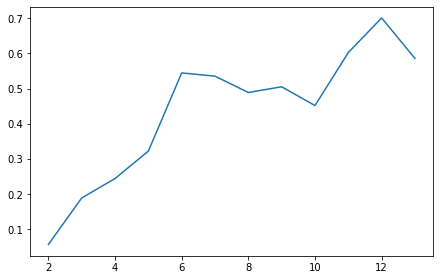

In [21]:
fig = plt.figure('stability plot',figsize=(7,4.326237))
ax = plt.axes([0.15,0.15,0.8,0.8])
# get x axis
if params['tmin'][1]-params['tmin'][0] > 0:
    x = result[:,0]
else:
    x = result[:,1]
y = [r.p['E_0'] for r in result[:,2]]
ax.errorbar(x=x,y=[i.mean for i in y],yerr=[i.sdev for i in y])
ax.set_xlabel(r'$t_{min}$', fontsize=20)
print(list(zip(x,y)))
plt.draw()
fig = plt.figure('Q-value',figsize=(7,4.326237))
ax = plt.axes([0.15,0.15,0.8,0.8])
ax.errorbar(x=x,y=[r.Q for r in result[:,2]])
print(list(zip(x,[r.Q for r in result[:,2]])))
plt.draw()

PS
SS


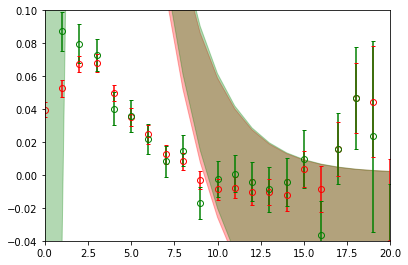

PS
SS


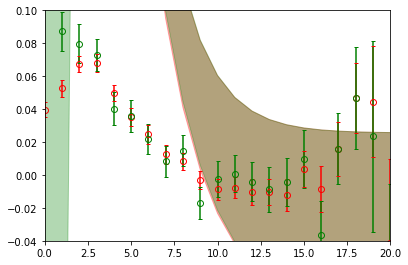

PS
SS


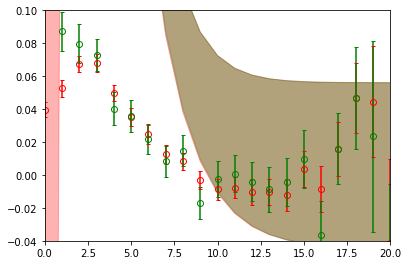

PS
SS


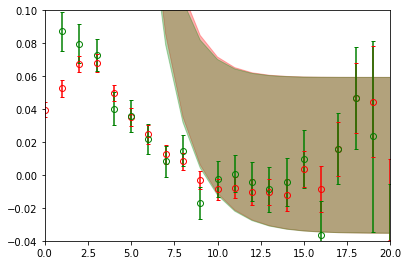

PS
SS


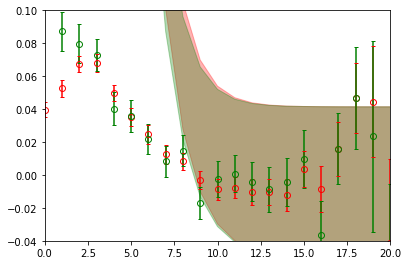

PS
SS


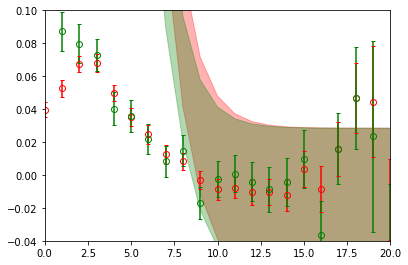

PS
SS


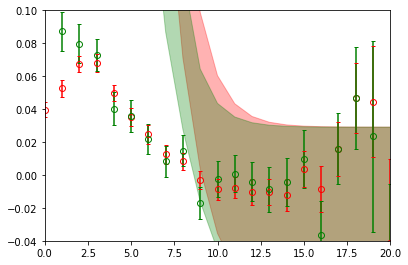

PS
SS


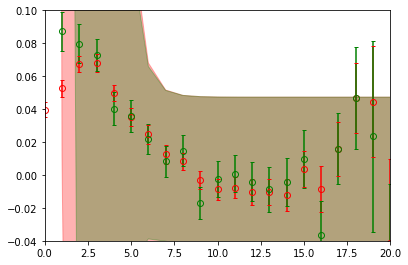

PS
SS


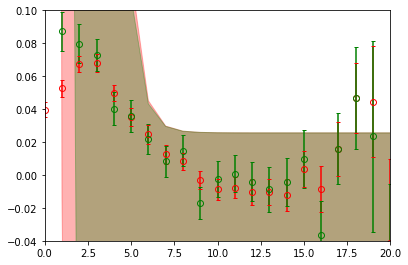

PS
SS


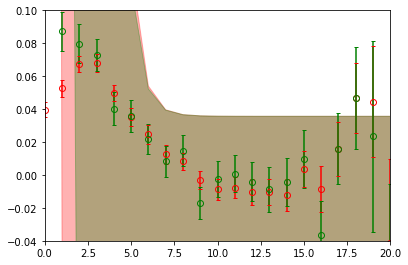

PS
SS


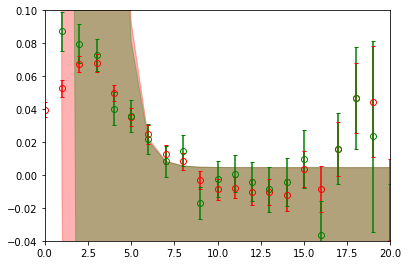

PS
SS


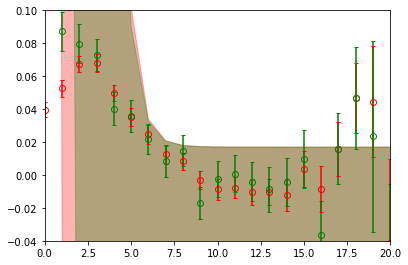

In [22]:
for r in range(len(result)):
    tp.plot_meff_fit(gvdata_p,gvdata_pp, params,result[r,2],lim=[0,20,-.04,.1],fname='tmin = %d'%result[r][0])

In [23]:
print('tmin E_0')
for r in range(len(result)):
    print( '%4d %s' %(result[r][0],result[r][2].p['E_0']))

tmin E_0
   2 -0.0061(62)
   3 -0.0029(54)
   4 0.0006(50)
   5 0.0012(47)
   6 -0.0005(46)
   7 -0.0020(48)
   8 -0.0026(55)
   9 0.0002(45)
  10 -0.0025(51)
  11 -0.0020(56)
  12 -0.0065(69)
  13 -0.0057(74)
